In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [22]:
# training data 
c = np.array([ 
    [3,1,1,2,3,1,1,3,3,1,3,3,1,2,1,2,3,1,1,3], 
    [4,6,6,4,4,6,5,4,5,4,6,6,4,6,5,4,6,5,4,5], 
    [3,5,4,3,5,3,5,4,3,3,3,5,5,5,4,5,4,3,4,5] 
])
c = c.transpose()

f = np.array([
    [-1.784756126,2.459396867,2.257275088,-1.210910465,-0.6847118428,1.359352584,1.782888766,-0.8868336222,-0.8474503192,-0.2544613231,-0.170942218,0.9291020647,0.8455829597,1.502947725,1.580766987,-0.1108661827,0.7269802854,0.6828444833,0.6434611803,0.2525939635],
    [0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0]
])
# f = np.array([
#     [-1.78475,2.45939,2.25727,-1.21091,-0.68471,1.35935,1.78288,-0.88683,-0.84745,-0.25446,-0.17094,0.92910,0.84558,1.50294,1.58076,-0.11086,0.72698,0.68284,0.64346,0.25259],
#     [0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0]
# ])
f = f.transpose()

# test data
a = np.array([ [2, 6, 3], [2, 6, 4], [2, 4, 4], [2,	5, 3], [2, 5, 5], [3, 5, 4], [2, 5, 4] ])

1/1 [==============================] - 0s 47ms/step
[0.7097683  0.75344956]
[1.572891  1.1239257]
[-0.28631628  0.02229995]
[-0.1044398   0.15787753]
[0.8672708 1.0104854]
[-0.17757803  0.02549574]
[0.6913375  0.87418914]


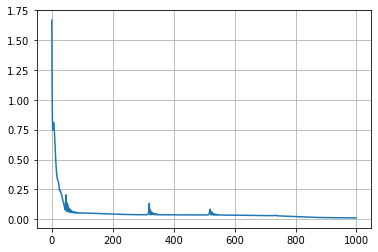

dict_keys(['loss']) 

Model layers: 

	 inputs number:  3
	 outputs number:  2

Layers weights: 

[array([[ 0.8265274 ,  0.03731315,  1.0742012 , -1.2988956 ,  0.2575315 ],
       [ 1.0048914 ,  0.5227529 , -1.1046615 , -0.7504095 ,  0.3588673 ],
       [ 0.46564305,  1.48025   , -0.00456754, -0.90049237, -2.0348947 ]],
      dtype=float32), array([ 0.7439292, -6.2039247,  2.8362923, -1.6799365,  2.4976964],
      dtype=float32)] 

[array([[ 0.290265  , -0.2812644 , -0.09911846, -0.8017018 , -0.53655535],
       [ 3.2328517 , -2.9774373 ,  0.86977506, -0.15900002,  0.8631026 ],
       [-8.60638   ,  2.8890796 , -8.729084  , -6.111184  , -3.5991898 ],
       [-0.17593518, -0.72659373, -0.723708  , -0.16771512,  0.42026135],
       [-6.6289926 ,  1.0631423 , -5.2836733 , -1.508912  , -3.389487  ]],
      dtype=float32), array([ 0.7523808 , -0.08300976, -0.4794425 , -0.40707088, -0.6943096 ],
      dtype=float32)] 

[array([[ 0.41535944,  2.0956016 ],
       [-3.6841567 ,  0.8307154 ],
  

In [27]:
# модель багатошарової нейронної мережі
model = keras.Sequential()
#bias_initializer = keras.initializers.HeNormal()

# вхідні дані
model.add(keras.Input(shape=(3,)))
# 1 слой 3 нейрони
model.add(Dense(
    units=5,                    # кількість нейронів
    #input_shape=(3,),           # кількість входів
    activation='sigmoid',       # активаційна функція
    #use_bias=True,              # використовувати зсув
    #bias_initializer='zeros'    # значення зсуву
))
# 2 слой 3 нейрони
model.add(Dense(
    units=5,                    # кількість нейронів
    #input_shape=(3,),           # кількість входів
    activation='sigmoid',       # активаційна функція
    #use_bias=True,              # використовувати зсув
    #bias_initializer='zeros'    # значення зсуву
))
# 3 слой 2 нейрони
model.add(Dense(
    units=2,                    # кількість нейронів
    #input_shape=(3,),           # кількість входів
    #activation='sigmoid',       # активаційна функція
    #use_bias=True,              # використовувати зсув
    #bias_initializer='zeros'    # значення зсуву
))

# loss критерій якості (середня квадратична помилка)
# оптимізатор алгоритм градієнтного спуску
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))
# навчання мережі
history = model.fit(c, f, epochs=1000, verbose=0)

# test network
ansv = model.predict(a)
for i in ansv:
    print(i)

# графіки
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

# системна інформація
print(history.history.keys(), '\n')
print("Model layers: \n")
print("\t inputs number: ", model.input_shape[1])
model_layers = model.layers
for layer in model_layers:
    print('\t',layer)
print("\t outputs number: ", model.output_shape[1])
print('\nLayers weights: \n')
for layer in model_layers:
    print(layer.get_weights(), '\n')

# expected result
# [ 0.40290344,  0.        ],
# [ 1.30082594,  1.        ],
# [-0.31298796,  0.        ],
# [-0.27360466,  0.        ],
# [ 0.82643962,  1.        ],
# [ 0.05047218,  0.        ],
# [ 0.62431784,  1.        ]]